In [48]:
import pprint
import matplotlib.pyplot as plt

from src import data as data_package
from src import prices
from src import fundamentals
import download_fundamentals

import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 60em; }</style>"))

In [49]:
pp = pprint.PrettyPrinter(indent=2)

In [50]:
pp.pprint(download_fundamentals.EXTRACTION_TREE)

{ 'balancesheet/year': ( 'Total Liab',
                         'Total Current Liabilities',
                         'Total Stockholder Equity',
                         'Total Assets',
                         'Total Current Assets'),
  'cashflow/year': ( 'Total Cashflows From Investing Activities',
                     'Total Cash From Financing Activities'),
  'financials/year': ( 'Total Revenue',
                       'Gross Profit',
                       'Operating Income',
                       'Net Income From Continuing Ops',
                       'Selling General Administrative',
                       'Research Development'),
  'info': ( 'sector',
            'industry',
            'marketCap',
            'sharesOutstanding',
            'trailingPE')}


In [51]:
data, info = data_package.load_data('./data')


There are a total of 499 entries.
Top columns with most nan values are [(Column name, nan mean values)]:
Research    334.75
PE           91.00
dtype: float64


In [52]:
pp.pprint(data_package.FUNDAMENTALS_RENAME_MAPPINGS)

{ 'info': { 'industry': 'Industry',
            'marketCap': 'Market Cap',
            'sector': 'Sector',
            'sharesOutstanding': 'Shares',
            'trailingPE': 'PE'},
  'year': { 'Gross Profit': 'Gross Profit',
            'Net Income From Continuing Ops': 'Net Income',
            'Operating Income': 'Operating Income',
            'Research Development': 'Research',
            'Selling General Administrative': 'Marketing',
            'Total Assets': 'Total Assets',
            'Total Cash From Financing Activities': 'Financing',
            'Total Cashflows From Investing Activities': 'Investing',
            'Total Current Assets': 'Current Assets',
            'Total Current Liabilities': 'Current Liabilities',
            'Total Liab': 'Total Liabilities',
            'Total Revenue': 'Revenue',
            'Total Stockholder Equity': 'Total Equity'}}


In [53]:
len(data['2020'])

446

In [54]:
data.keys()

dict_keys(['2020', 'prices', '2019', '2017', '2018'])

In [55]:
# data['prices'].fillna(method='bfill', inplace=True, axis=1)
# data['prices'].fillna(method='ffill', inplace=True, axis=1)

In [56]:
data['prices'].head()

Ticker,A,AAL,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,46.490002,46.299999,29.037500,62.410000,82.610001,39.049999,116.459999,103.480003,72.510002,46.189999,...,40.619999,59.070000,90.889999,58.619999,49.650002,63.209999,103.330002,86.250000,43.180000,53.590000
2017-01-04,47.099998,46.700001,29.004999,63.290001,84.660004,39.360001,116.739998,104.139999,72.360001,46.110001,...,40.799999,58.639999,89.889999,59.099998,50.389999,63.439999,104.279999,87.029999,43.799999,54.110001
2017-01-05,46.540001,45.889999,29.152500,63.770000,83.680000,39.700001,114.989998,105.910004,71.320000,45.770000,...,40.799999,57.930000,88.550003,58.330002,49.930000,63.650002,104.949997,84.750000,43.090000,53.930000
2017-01-06,47.990002,46.209999,29.477501,63.790001,84.800003,40.779999,116.300003,108.300003,71.599998,44.720001,...,40.919998,59.049999,88.500000,58.290001,49.580002,64.419998,104.959999,85.959999,43.369999,54.099998
2017-01-09,48.139999,47.080002,29.747499,64.209999,85.480003,40.740002,115.000000,108.570000,71.940002,44.750000,...,40.299999,59.060001,87.040001,58.470001,49.369999,64.599998,107.000000,85.970001,42.900002,53.950001


In [57]:
data['prices'].tail()

Ticker,A,AAL,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-24,117.309998,15.660000,131.970001,103.260002,96.970001,108.349998,257.299988,499.859985,144.470001,49.439999,...,64.629997,141.990005,41.599998,51.820000,100.250000,107.540001,149.250000,376.890015,43.340000,160.720001
2020-12-28,117.830002,16.059999,136.690002,103.449997,96.800003,107.790001,259.679993,498.950012,144.679993,49.700001,...,65.320000,141.520004,41.740002,52.310001,100.370003,109.779999,148.889999,382.589996,43.360001,162.389999
2020-12-29,117.230003,15.860000,134.869995,104.699997,97.120003,108.330002,257.760010,502.109985,143.660004,49.450001,...,65.419998,139.899994,41.270000,51.250000,99.510002,109.449997,152.449997,378.040009,42.770000,163.119995
2020-12-30,117.389999,16.150000,133.720001,105.269997,96.959999,108.440002,257.540009,497.450012,146.179993,49.910000,...,65.650002,142.100006,41.599998,51.459999,100.779999,109.510002,152.220001,383.750000,43.220001,164.270004
2020-12-31,118.489998,15.770000,132.690002,107.150002,97.760002,109.489998,261.209991,500.119995,147.729996,50.410000,...,66.669998,141.770004,41.220001,52.360001,101.790001,108.559998,154.089996,384.329987,43.439999,165.500000


In [58]:
data['2020'].head()

,Total Liabilities,Current Liabilities,Total Equity,Total Assets,Current Assets,Revenue,Gross Profit,Operating Income,Net Income,Marketing,Investing,Financing,Sector,Industry,Market Cap,Shares
Ticker,,,,,,,,,,,,,,,,
A,4.754000e+09,1.467000e+09,4.873000e+09,9.627000e+09,3.415000e+09,5.339000e+09,2.837000e+09,1.044000e+09,7.190000e+08,1.395000e+09,-1.470000e+08,-7.170000e+08,Healthcare,Diagnostics & Research,40238415872,3.046980e+08
AAL,6.887500e+10,1.656900e+10,-6.867000e+09,6.200800e+10,1.109500e+10,1.733700e+10,-5.536000e+09,-1.105800e+10,-8.885000e+09,5.130000e+08,-4.342000e+09,1.099400e+10,Industrials,Airlines,14383910912,6.413830e+08
AAPL,2.585490e+11,1.053920e+11,6.533900e+10,3.238880e+11,1.437130e+11,2.745150e+11,1.049560e+11,6.628800e+10,5.741100e+10,1.991600e+10,-4.289000e+09,-8.682000e+10,Technology,Consumer Electronics,2116321411072,1.668760e+10
ABBV,1.374680e+11,2.866100e+10,1.307600e+10,1.505650e+11,2.417300e+10,4.580400e+10,3.174700e+10,1.569900e+10,4.622000e+09,9.867000e+09,-3.755700e+10,-1.150100e+10,Healthcare,Drug Manufacturers—General,205994229760,1.766220e+09
ABC,4.511447e+10,3.385308e+10,-1.018924e+09,4.427483e+10,3.305570e+10,1.898939e+11,5.188229e+09,2.067735e+09,-3.399558e+09,2.729432e+09,-3.798710e+08,-6.036170e+08,Healthcare,Medical Distribution,24562020352,2.054110e+08


In [59]:
info.head()

,Sector,Industry,Market Cap,Shares,PE
Ticker,,,,,
A,Healthcare,Diagnostics & Research,40238415872,3.046980e+08,50.850983
AAL,Industrials,Airlines,14383910912,6.413830e+08,NaN
AAPL,Technology,Consumer Electronics,2116321411072,1.668760e+10,28.505283
ABBV,Healthcare,Drug Manufacturers—General,205994229760,1.766220e+09,40.037758
ABC,Healthcare,Medical Distribution,24562020352,2.054110e+08,NaN


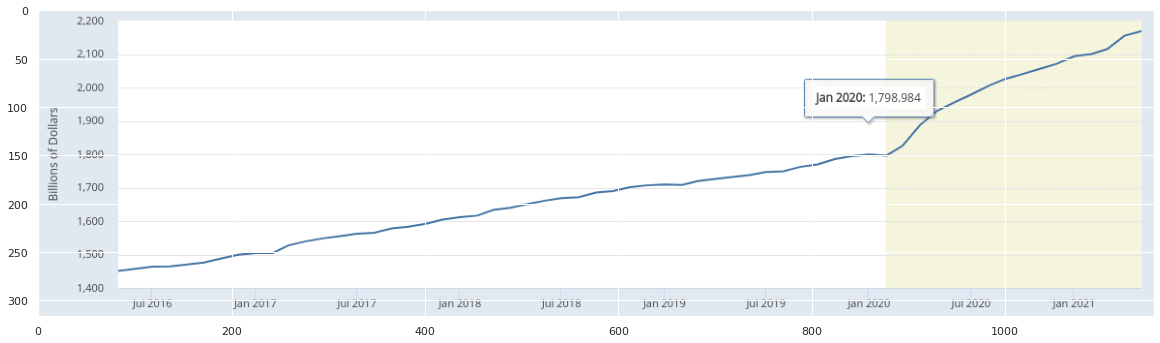

In [60]:
plt.imshow(plt.imread('./images/money_in_circulation.png'))

In [61]:
MONEY_START_2020 = 1799
MONEY_END_2020 = 2093
new_money_printed_2020 = (MONEY_END_2020 - MONEY_START_2020) / MONEY_END_2020
print(f'{new_money_printed_2020*100}%')

14.046822742474916%


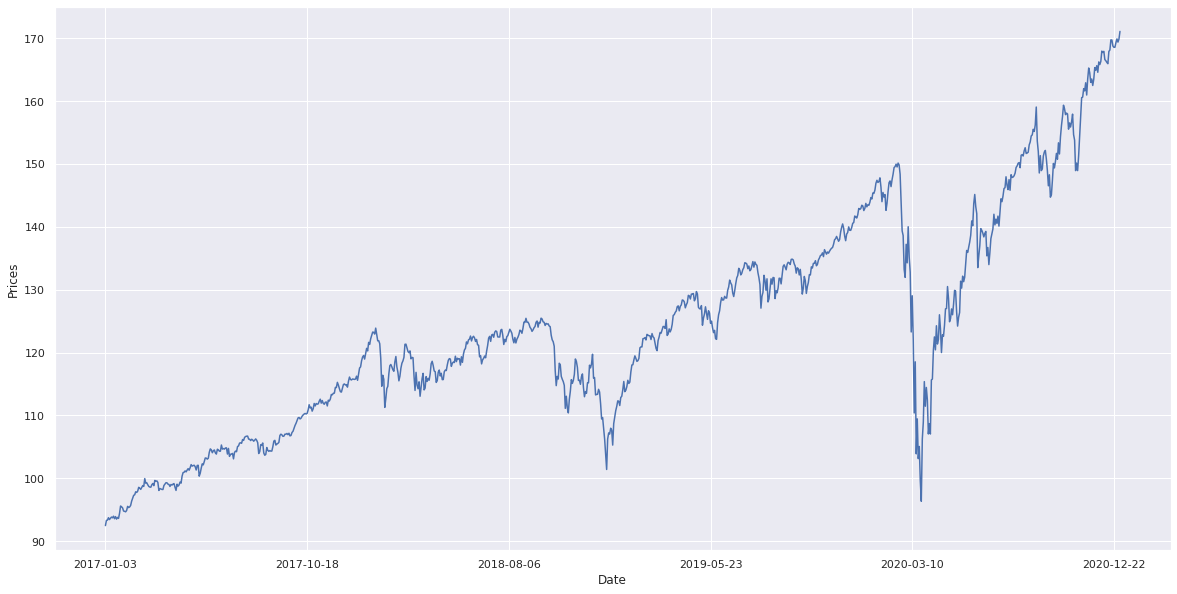

In [62]:
prices.plot_mean_prices(data['prices'], show=True)

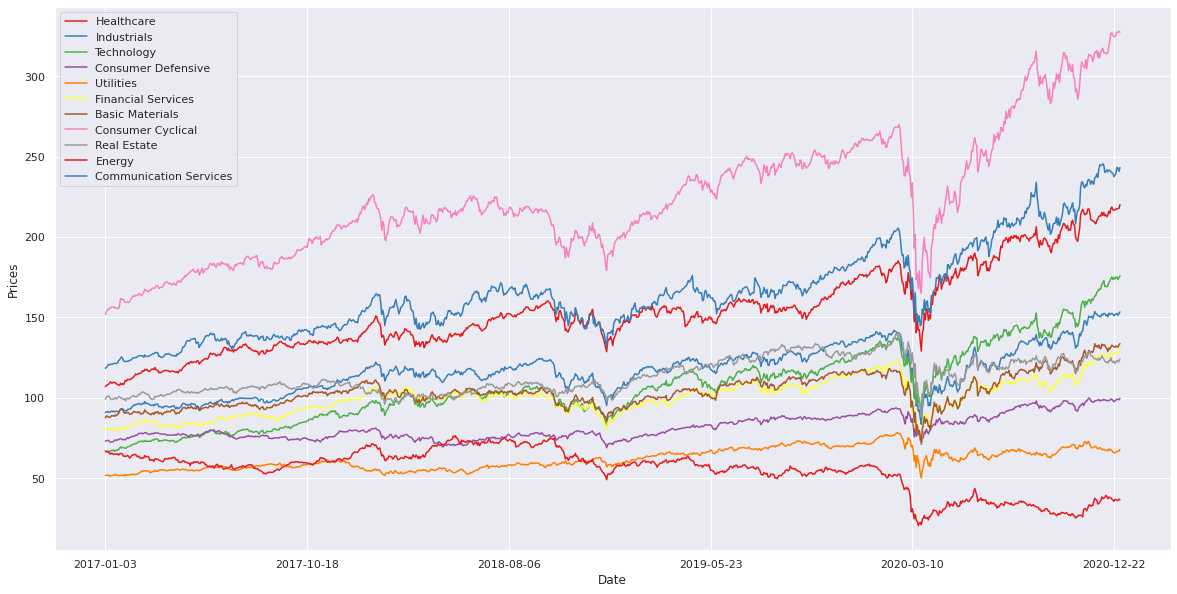

In [63]:
prices.plot_mean_prices_by_sector(data['prices'], info, show=True)

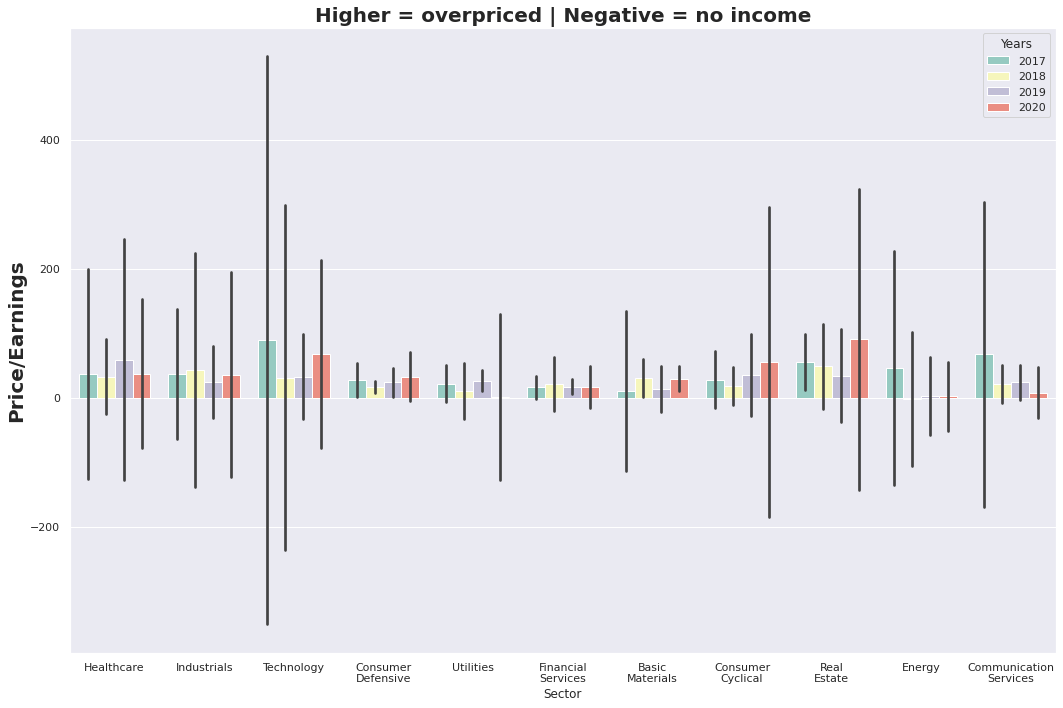

In [64]:
prices.plot_price_per_earning_by_sector(data, info, show=True)

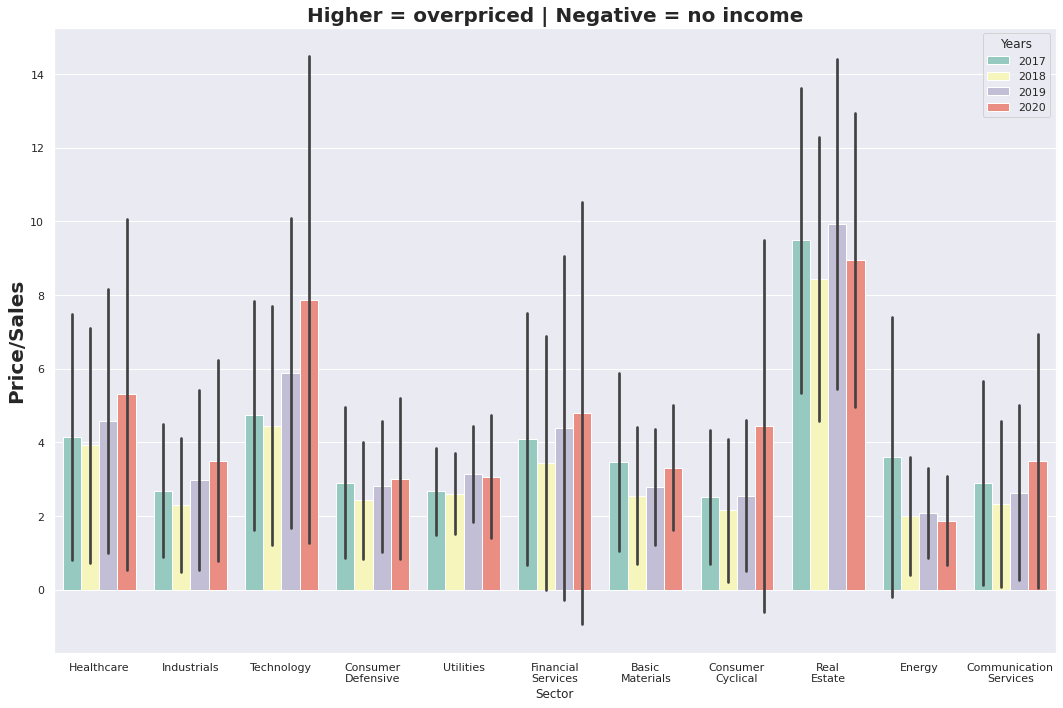

In [65]:
prices.plot_price_per_revenue_by_sector(data, info, show=True)

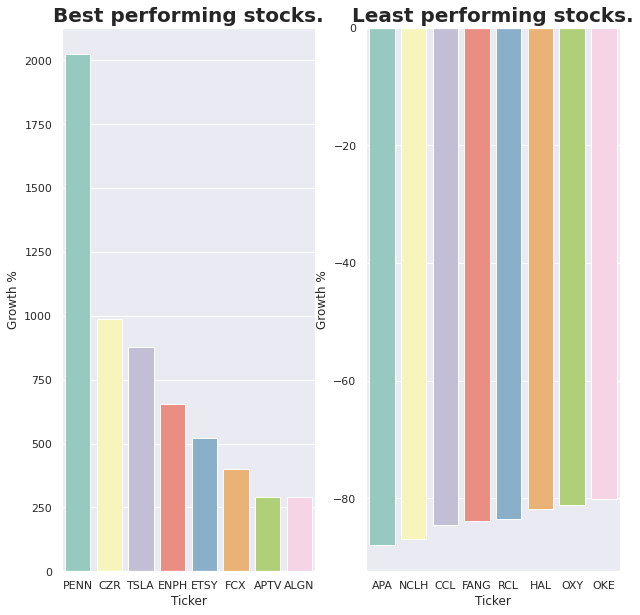

In [66]:
stats_dict = prices.plot_best_performing_assets(data['prices'], k=8, show=True)

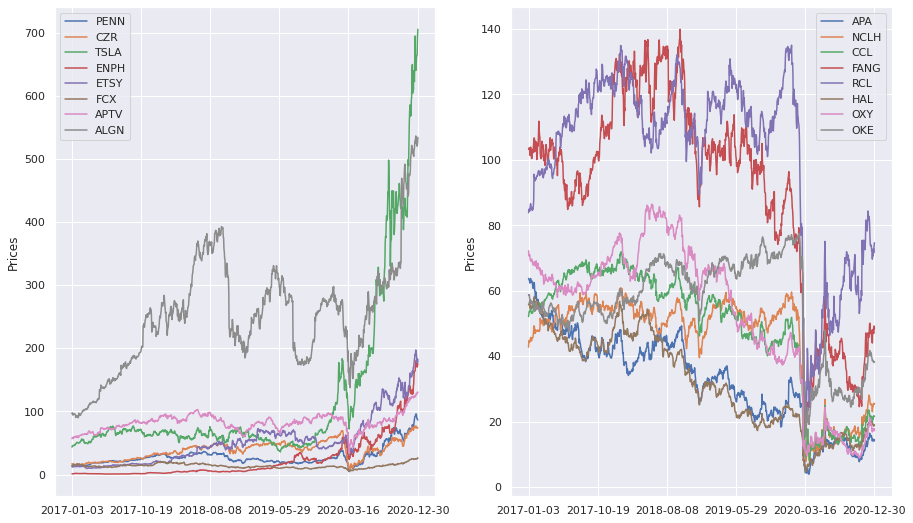

In [67]:
prices.plot_tickers(data['prices'], tickers=[stats_dict['best'], stats_dict['least']], show=True)

In [68]:
info.loc[stats_dict['best']]

,Sector,Industry,Market Cap,Shares,PE
Ticker,,,,,
PENN,Consumer Cyclical,Resorts & Casinos,12016825344,1.565710e+08,NaN
CZR,Consumer Cyclical,Resorts & Casinos,20421091328,2.086020e+08,NaN
TSLA,Consumer Cyclical,Auto Manufacturers,555301928960,9.633300e+08,577.595150
ENPH,Technology,Solar,19054176256,1.356990e+08,208.640410
ETSY,Consumer Cyclical,Internet Retail,21901529088,1.270980e+08,64.035675
FCX,Basic Materials,Copper,59396857856,1.464600e+09,33.133170
APTV,Consumer Cyclical,Auto Parts,36950654976,2.704630e+08,20.501200
ALGN,Healthcare,Medical Devices,46574465024,7.913560e+07,102.123886


In [69]:
info.loc[stats_dict['least']]

,Sector,Industry,Market Cap,Shares,PE
Ticker,,,,,
APA,Energy,Oil & Gas E&P,7690494976,377967008.0,NaN
NCLH,Consumer Cyclical,Travel Services,10577855488,368320000.0,NaN
CCL,Consumer Cyclical,Travel Services,32311255040,973540992.0,NaN
FANG,Energy,Oil & Gas E&P,13570935808,180982000.0,NaN
RCL,Consumer Cyclical,Travel Services,21287227392,254571008.0,NaN
HAL,Energy,Oil & Gas Equipment & Services,19747311616,889718976.0,NaN
OXY,Energy,Oil & Gas E&P,22999078912,933460992.0,NaN
OKE,Energy,Oil & Gas Midstream,23555540992,445536992.0,20.4368


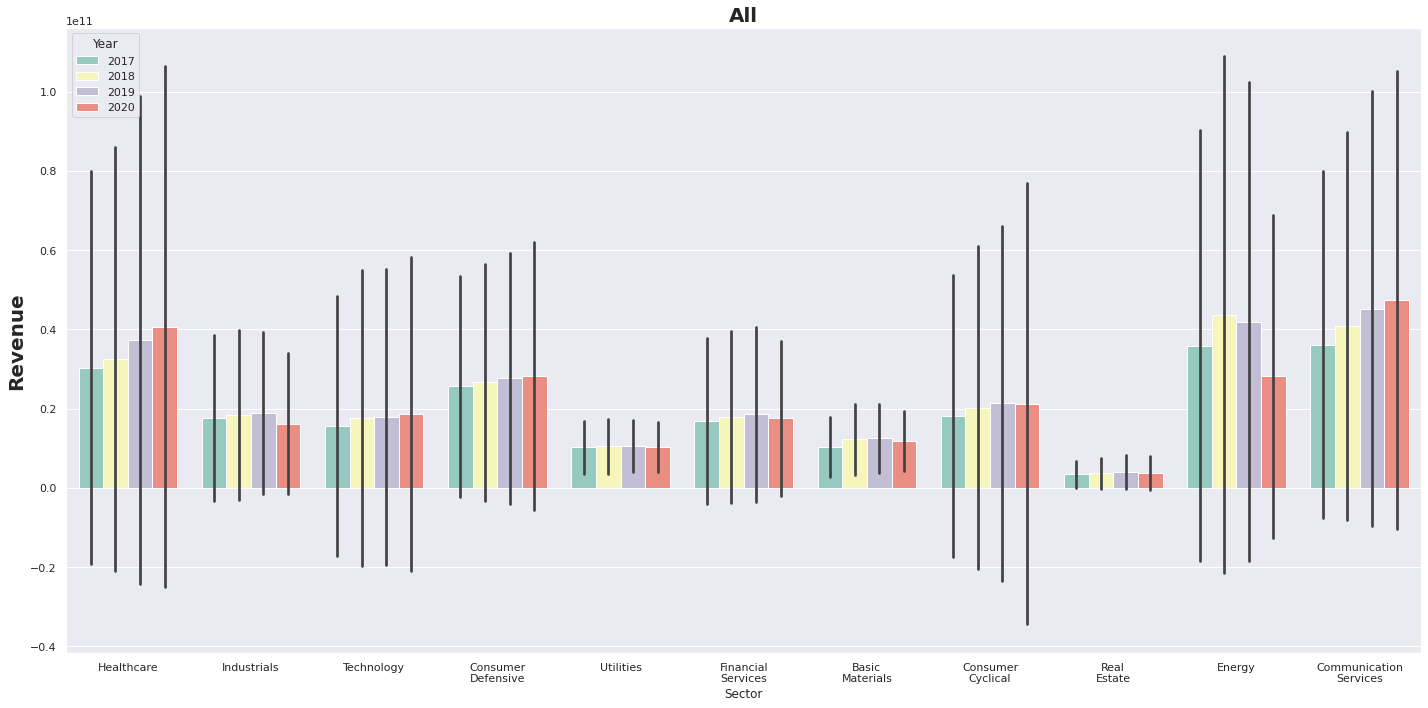

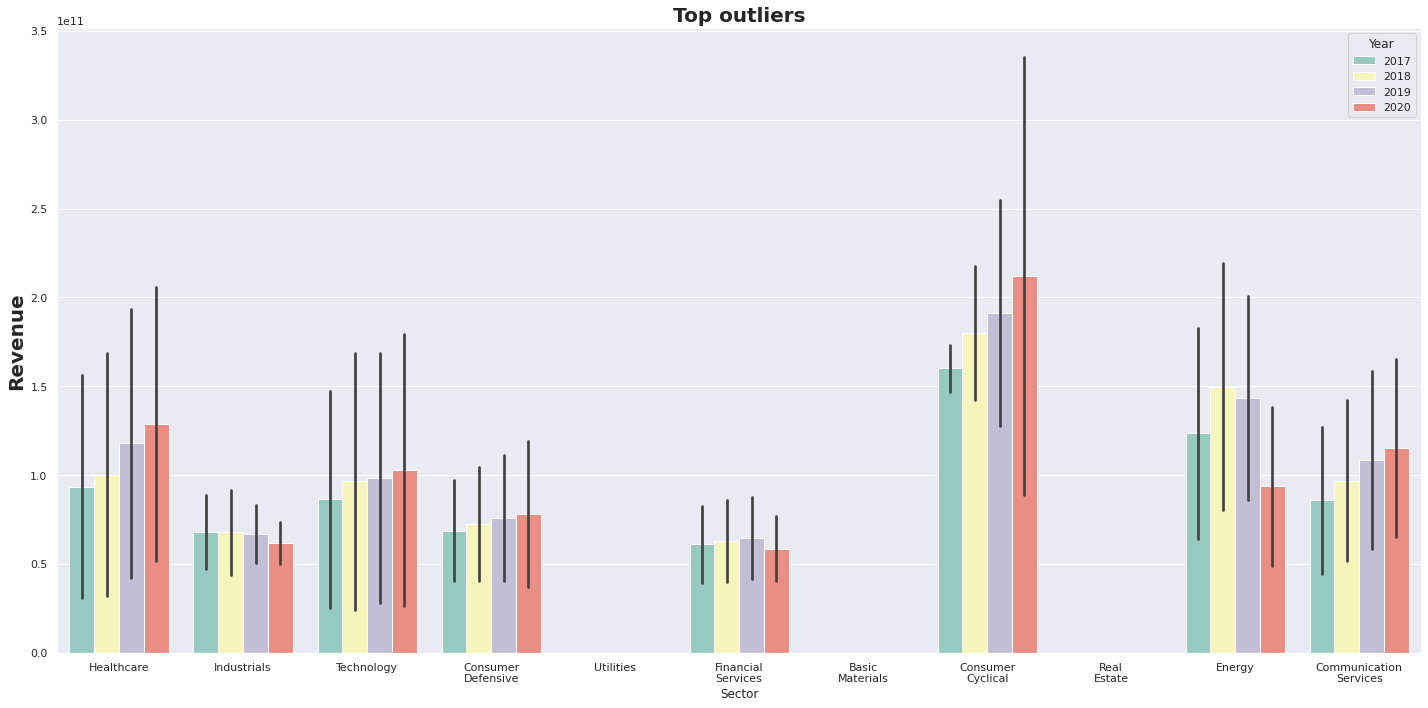

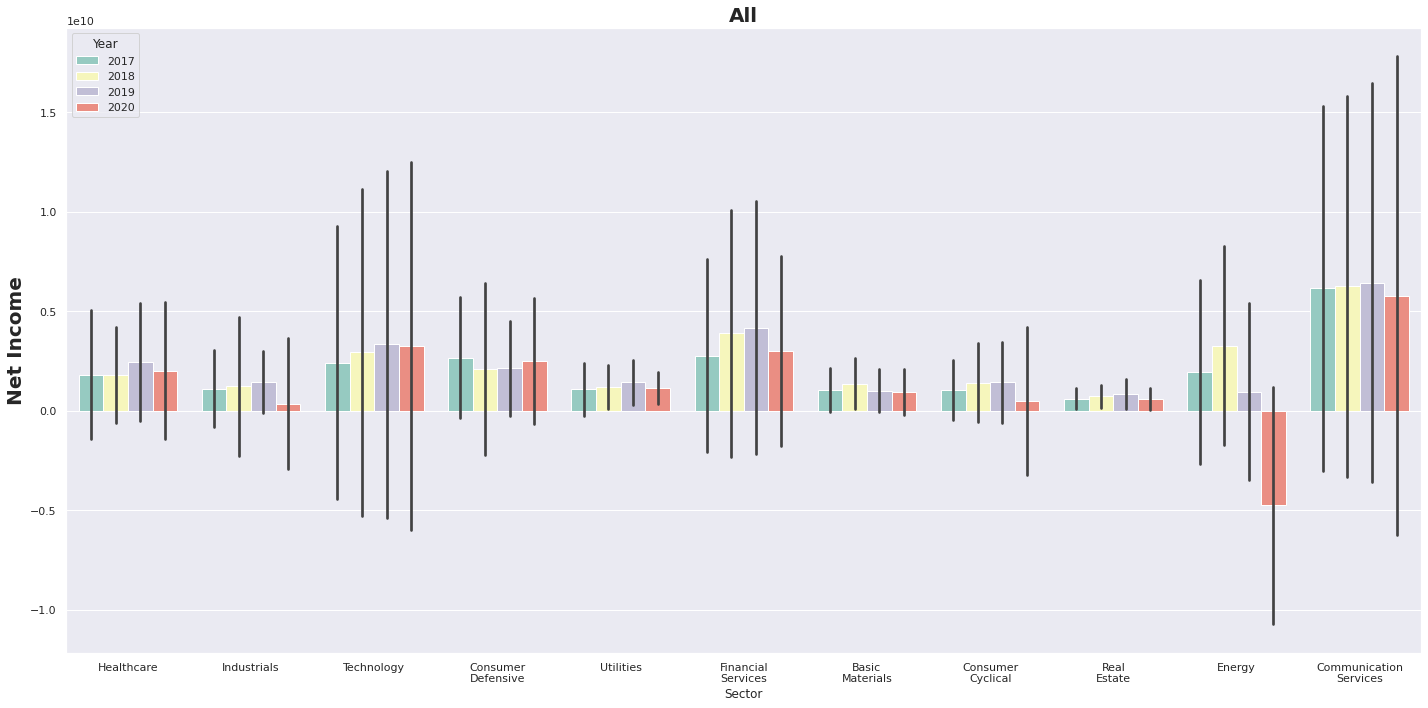

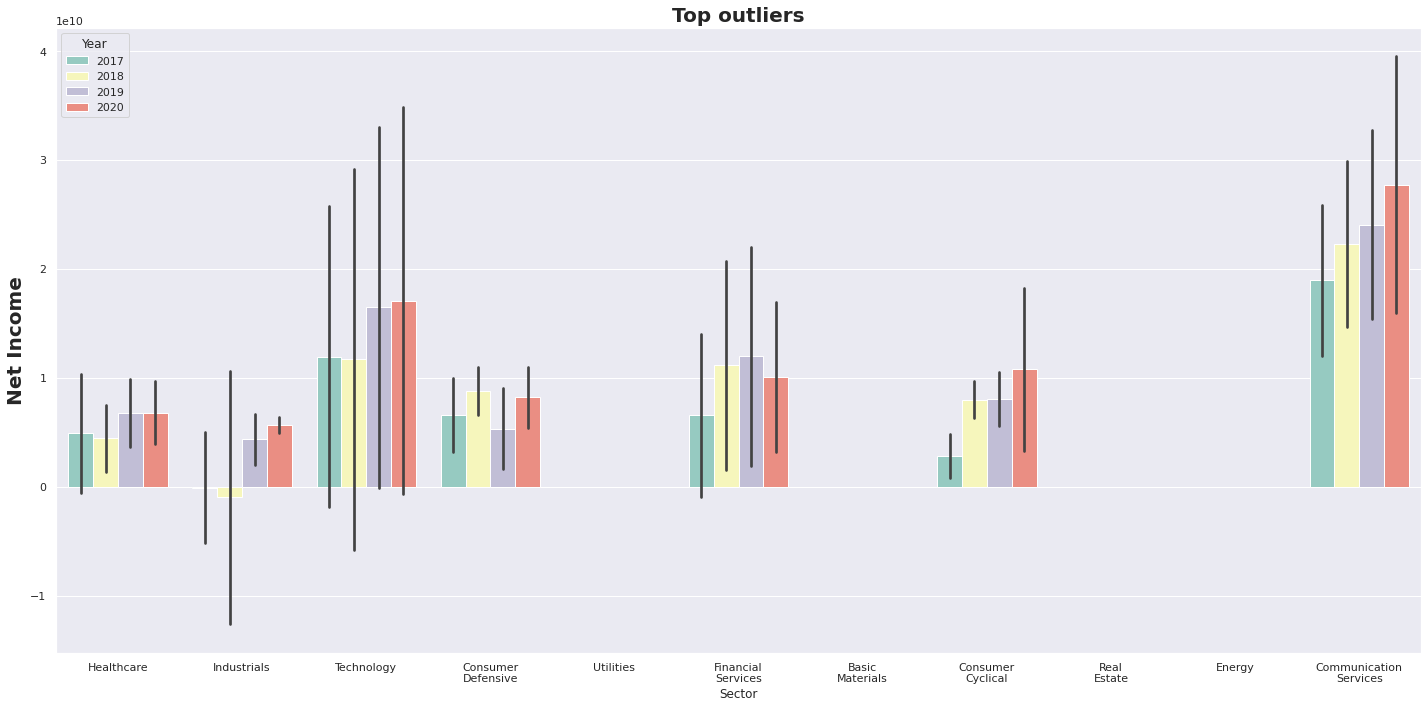

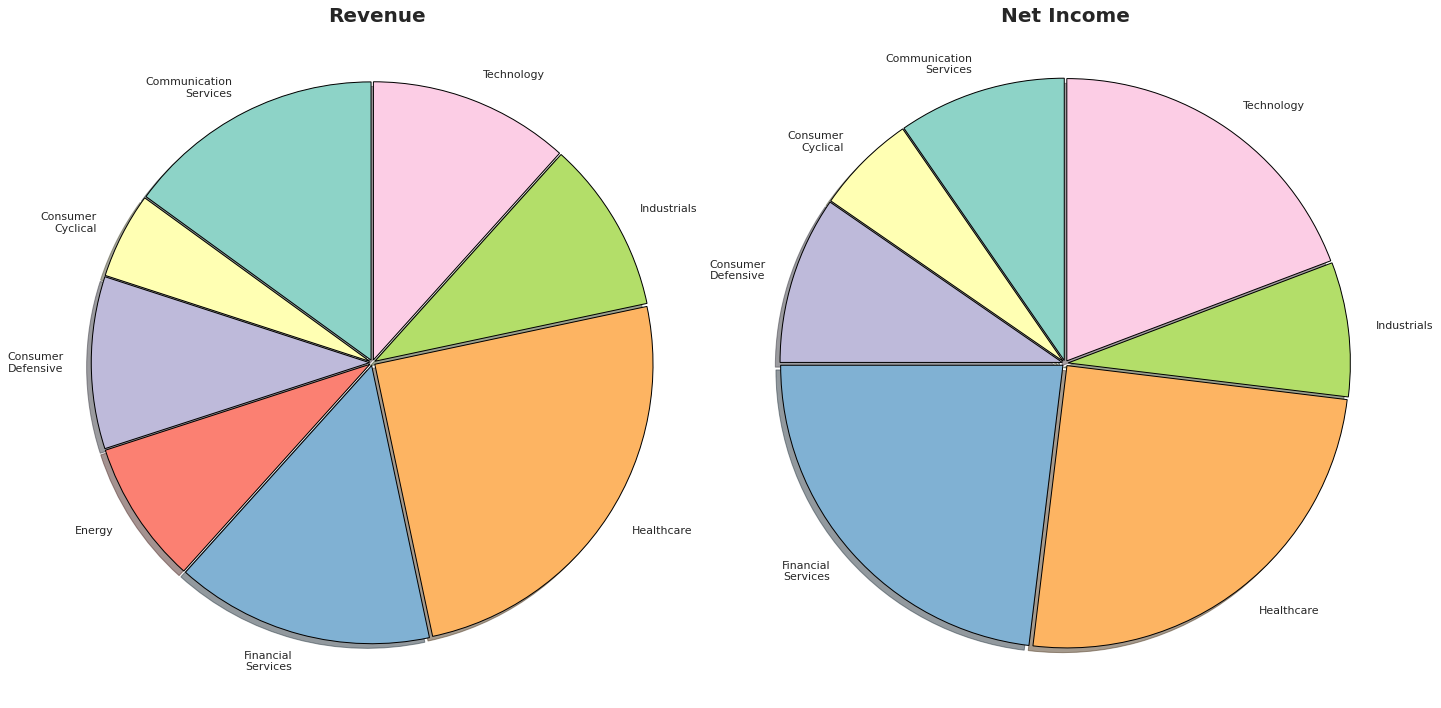

In [70]:
income_statement_outliers = fundamentals.plot_sectors(
        data,
        columns=['Revenue', 'Net Income'],
        show_barplot=True,
        show_outliers=True
    )

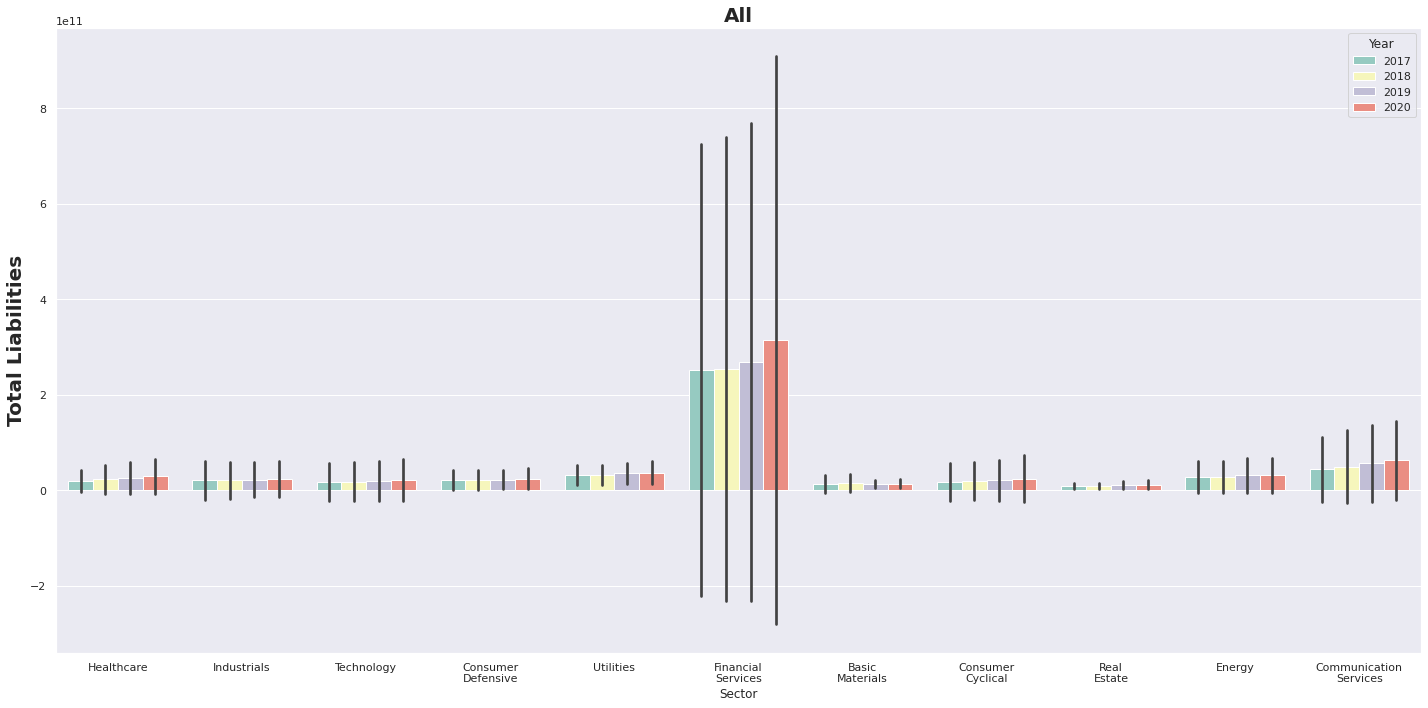

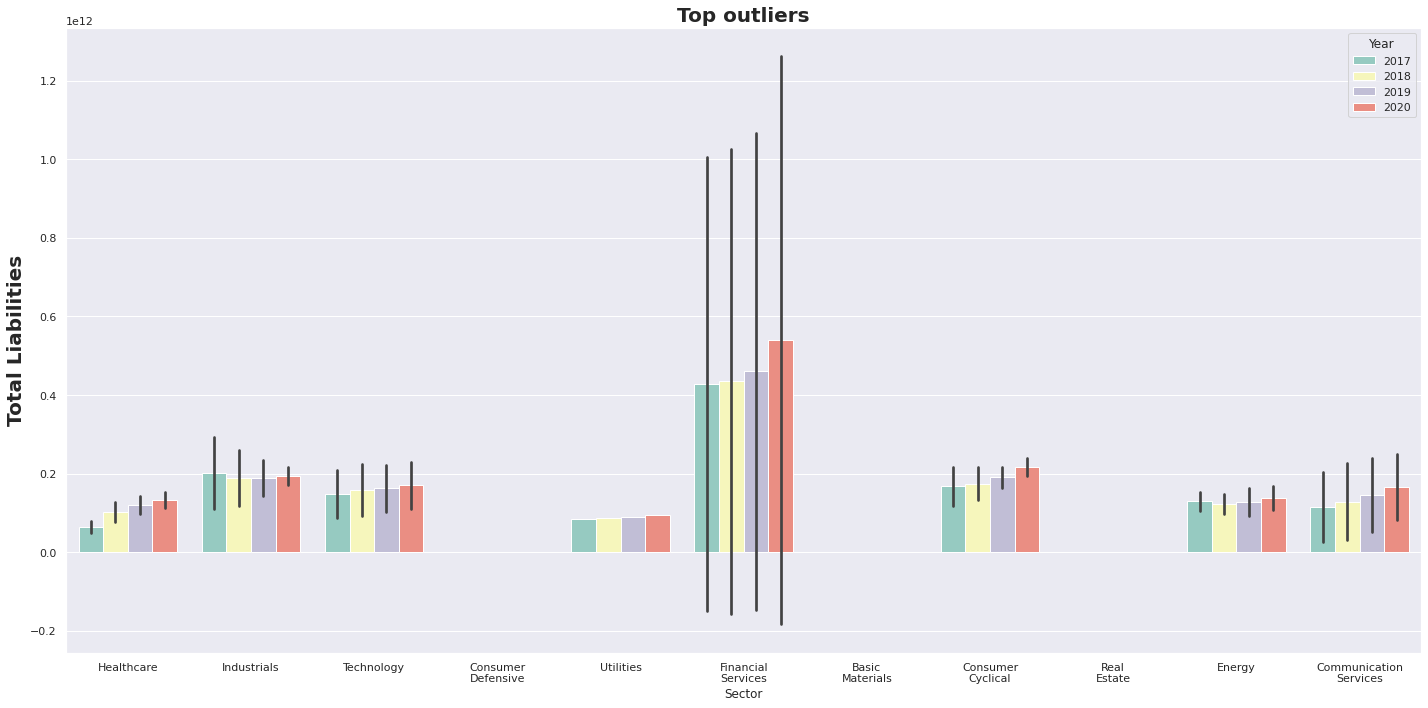

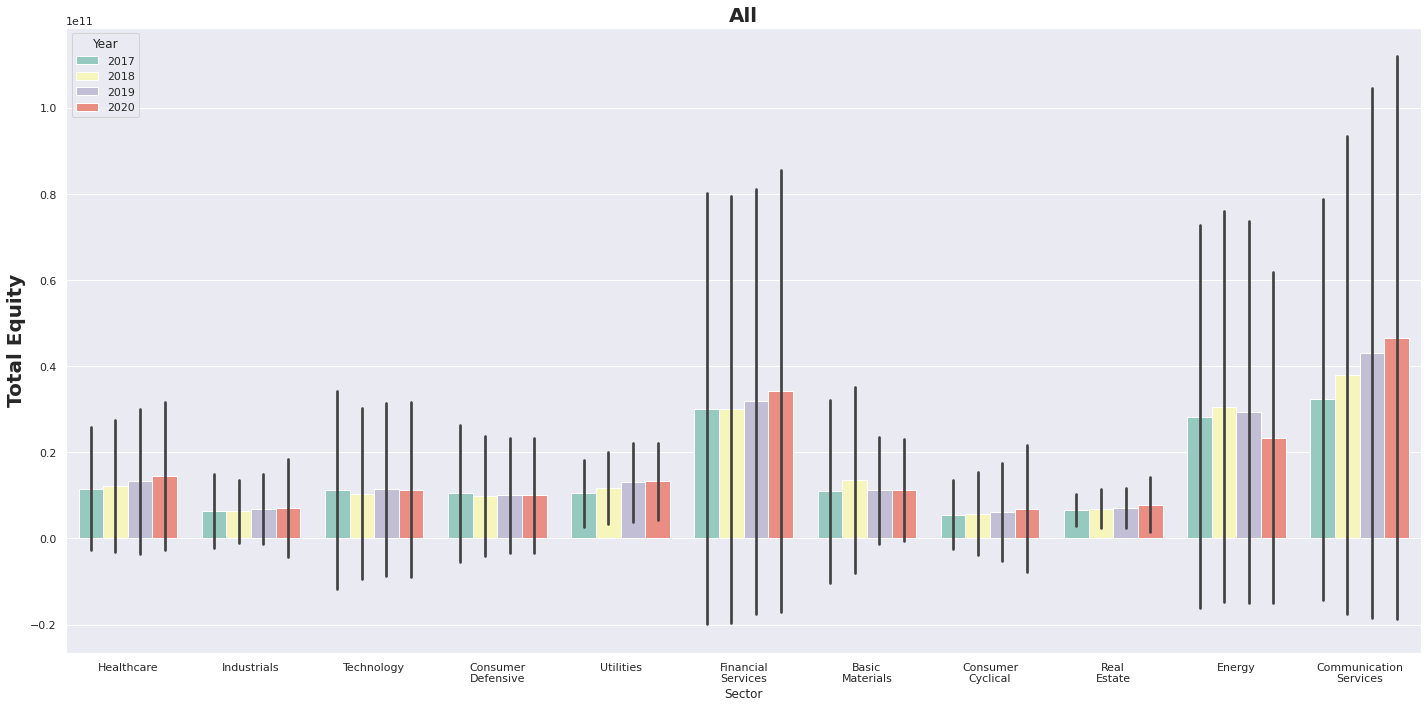

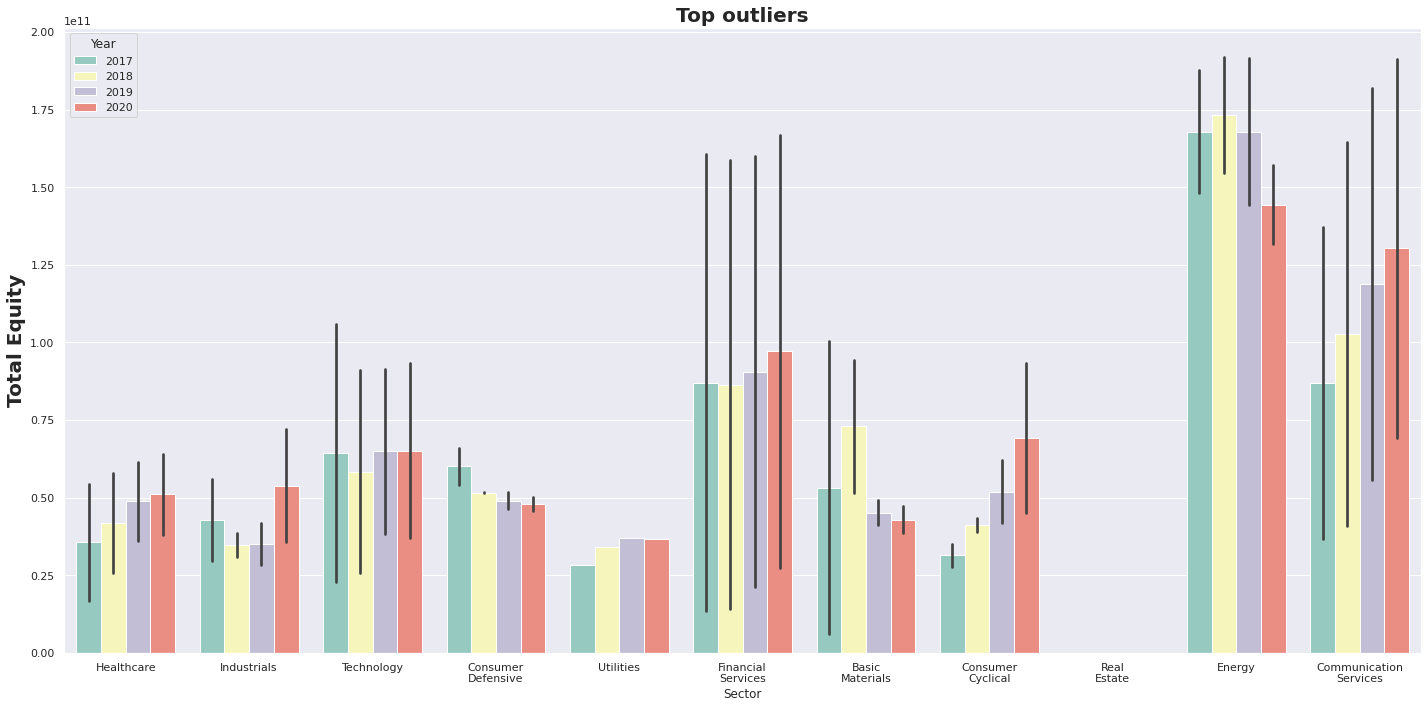

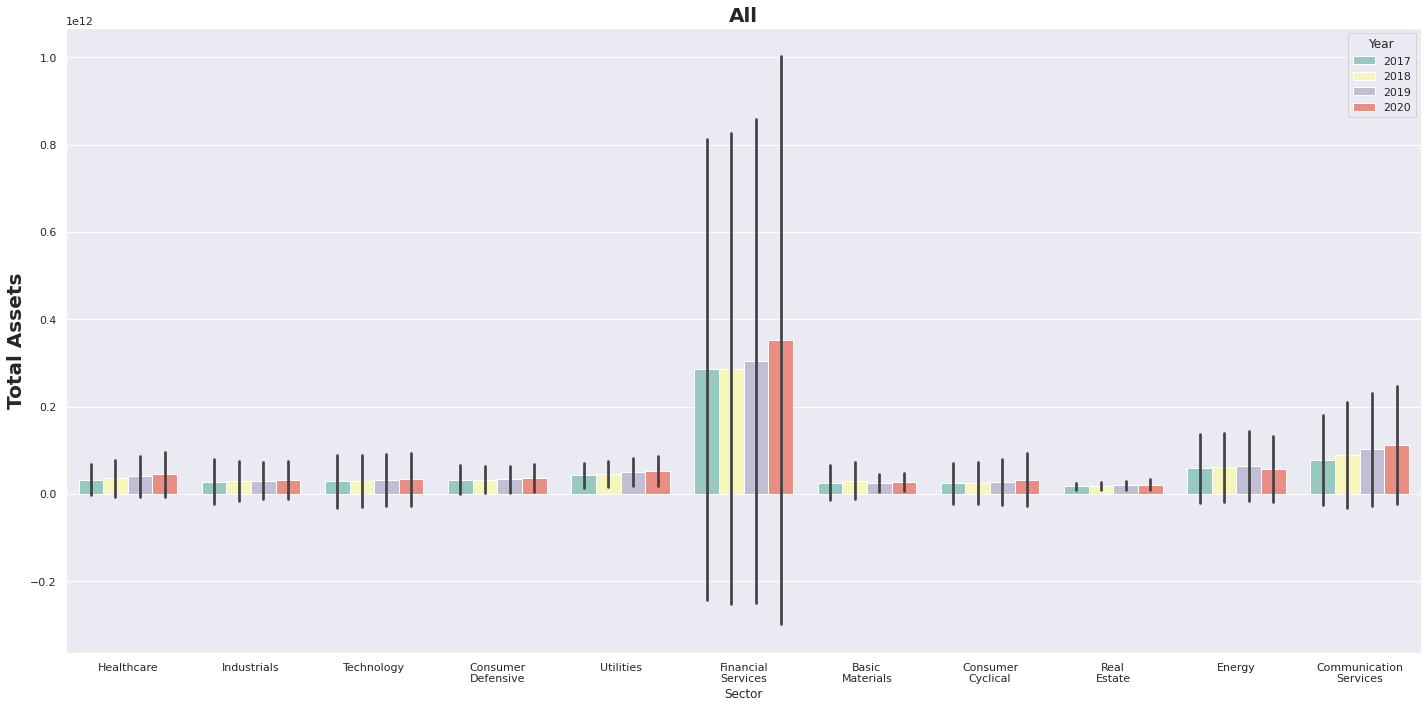

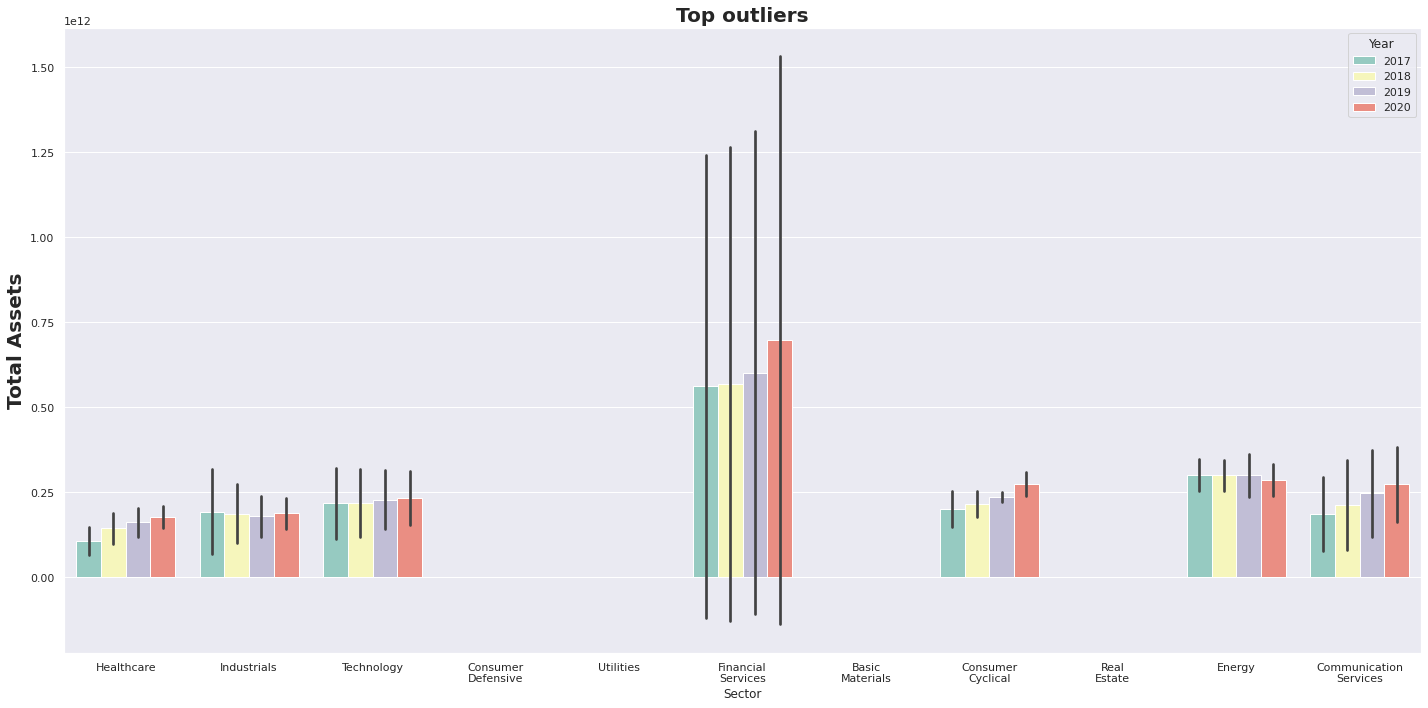

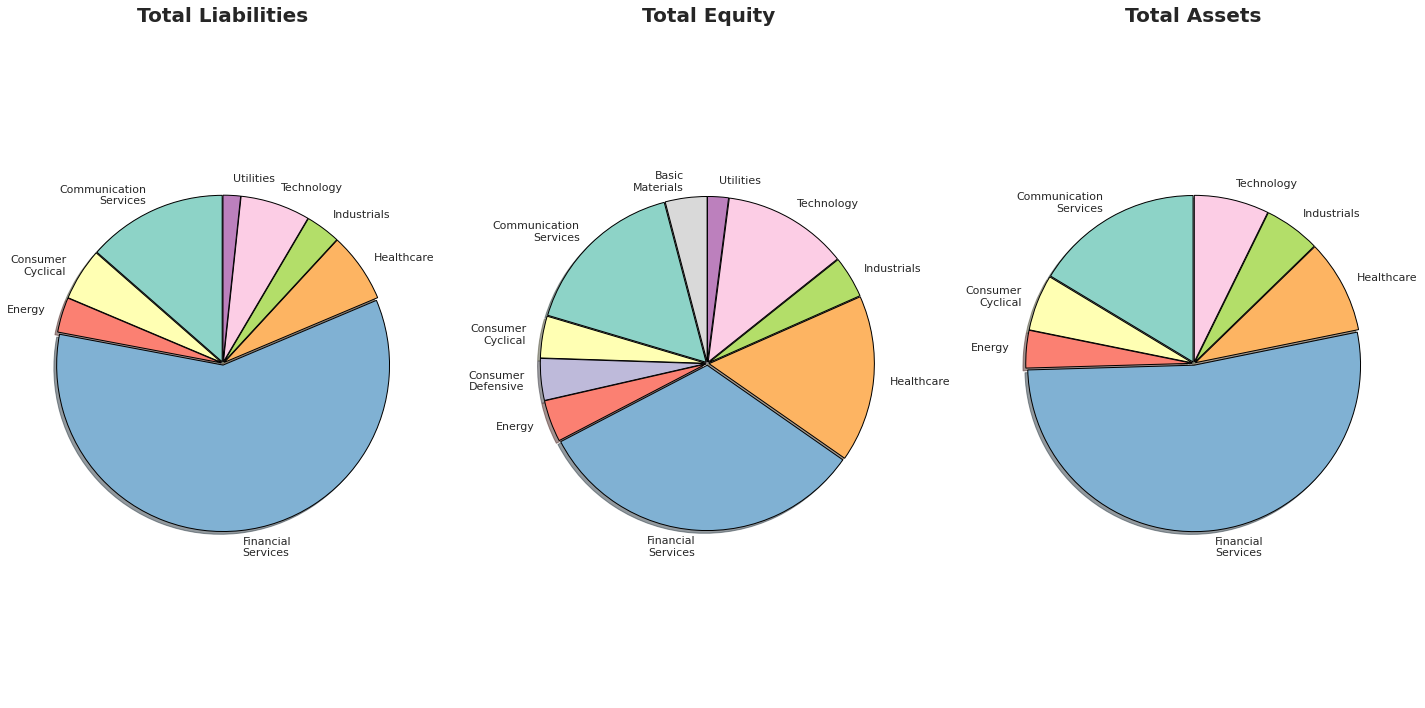

In [75]:
balance_sheet_outliers = fundamentals.plot_sectors(
    data,
    columns=['Total Liabilities', 'Total Equity', 'Total Assets'],
    show_barplot=True,
    show_outliers=True
)

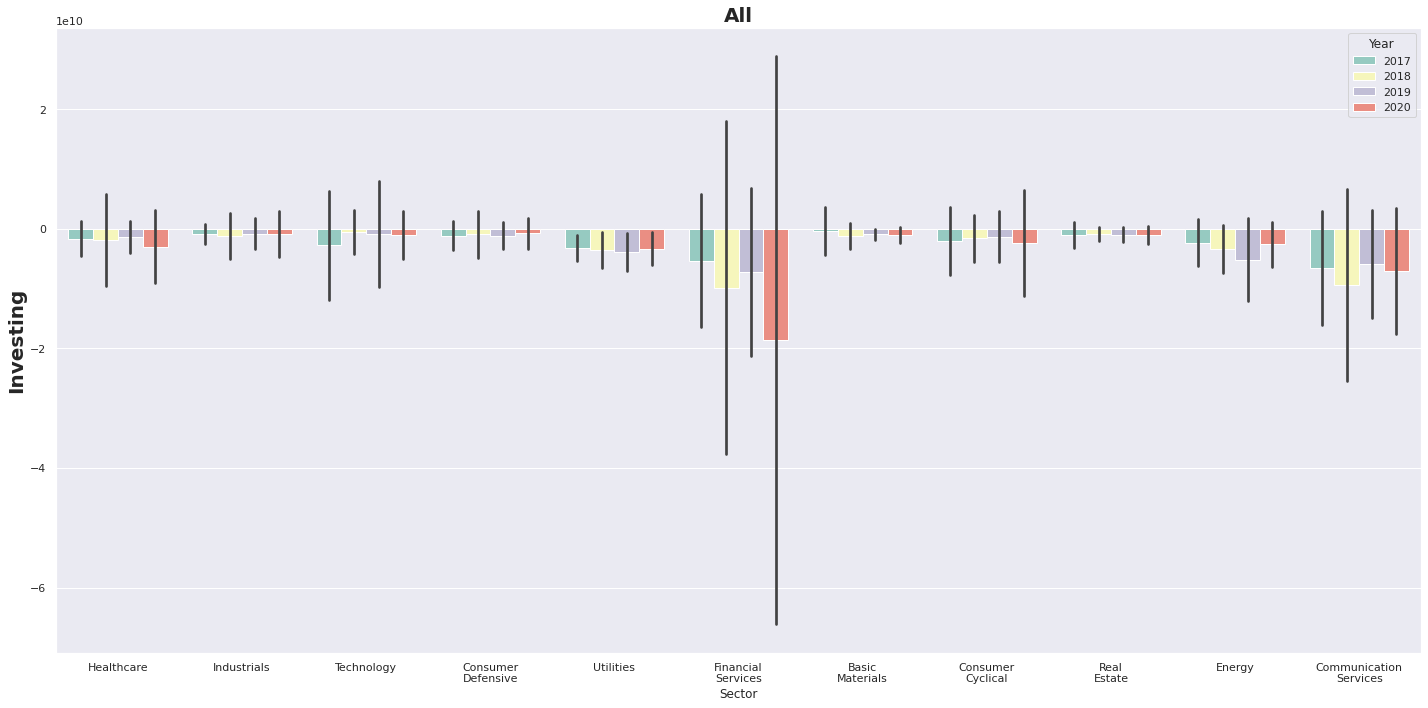

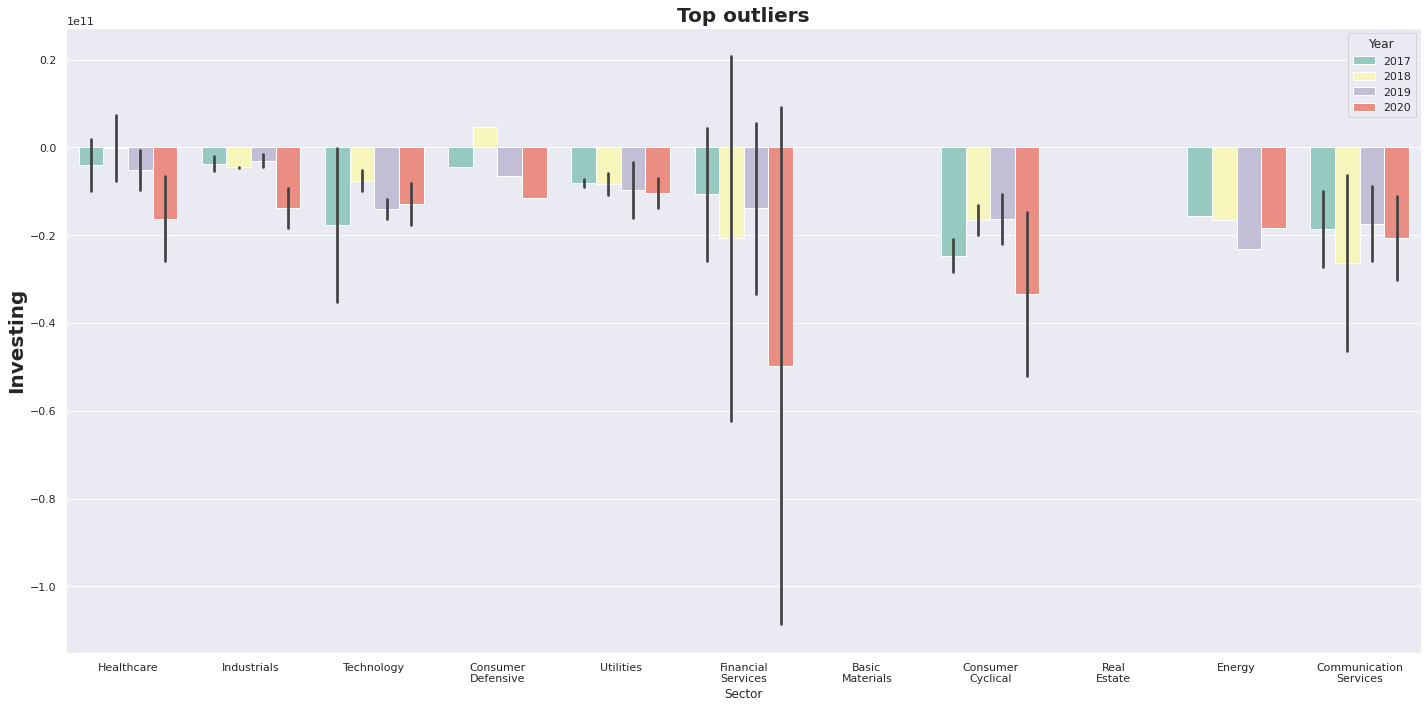

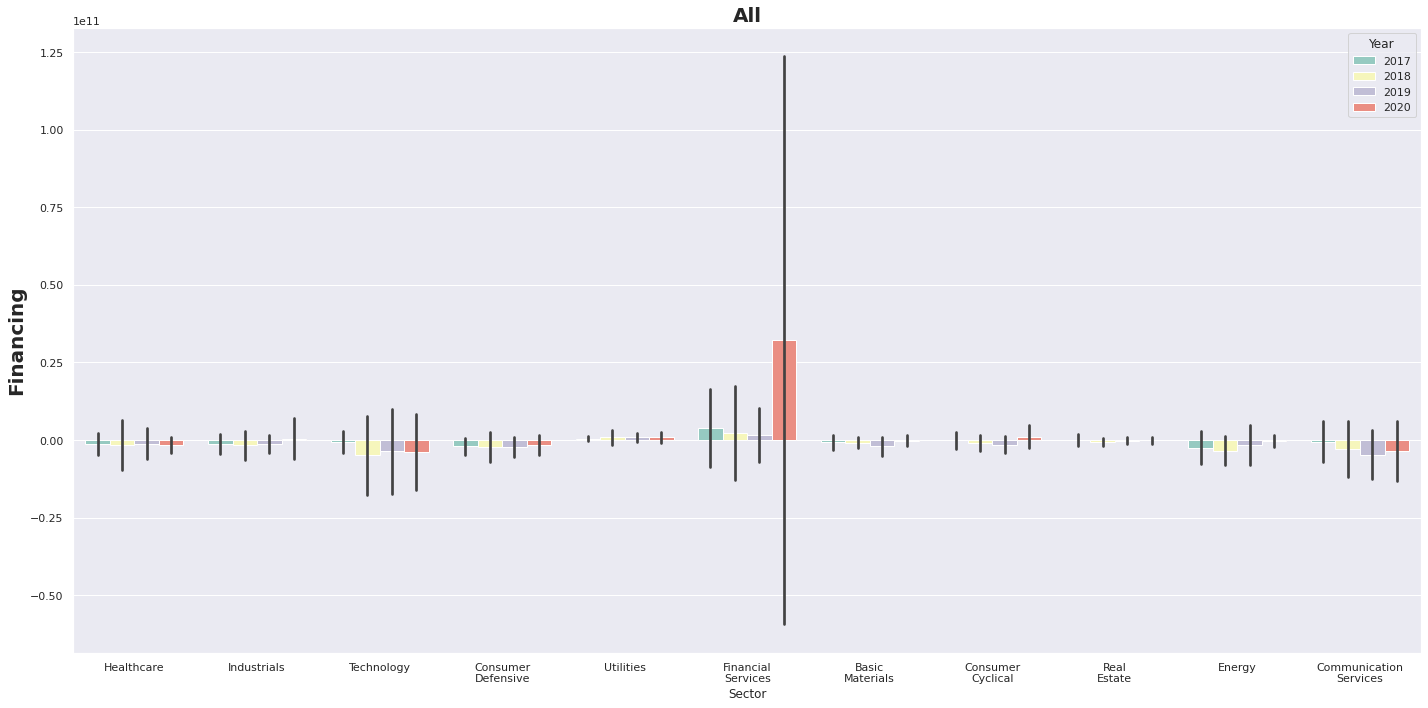

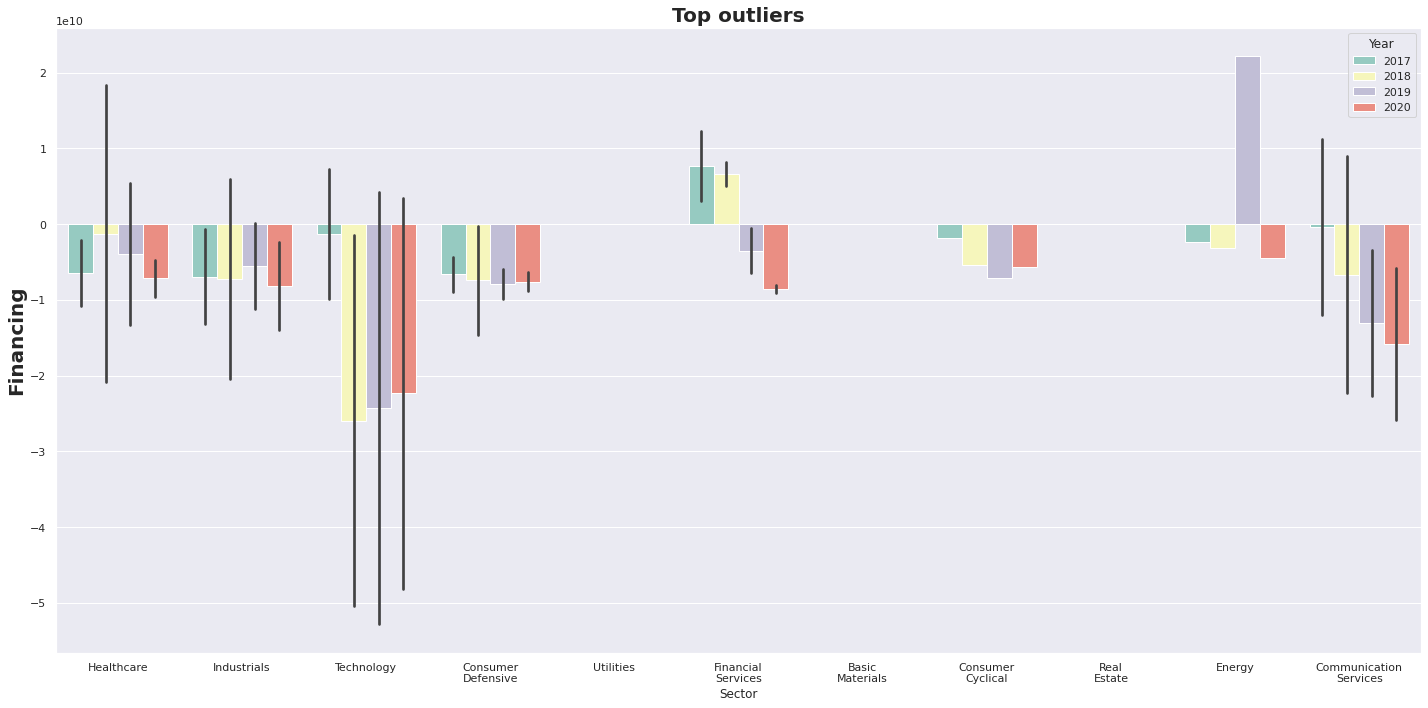

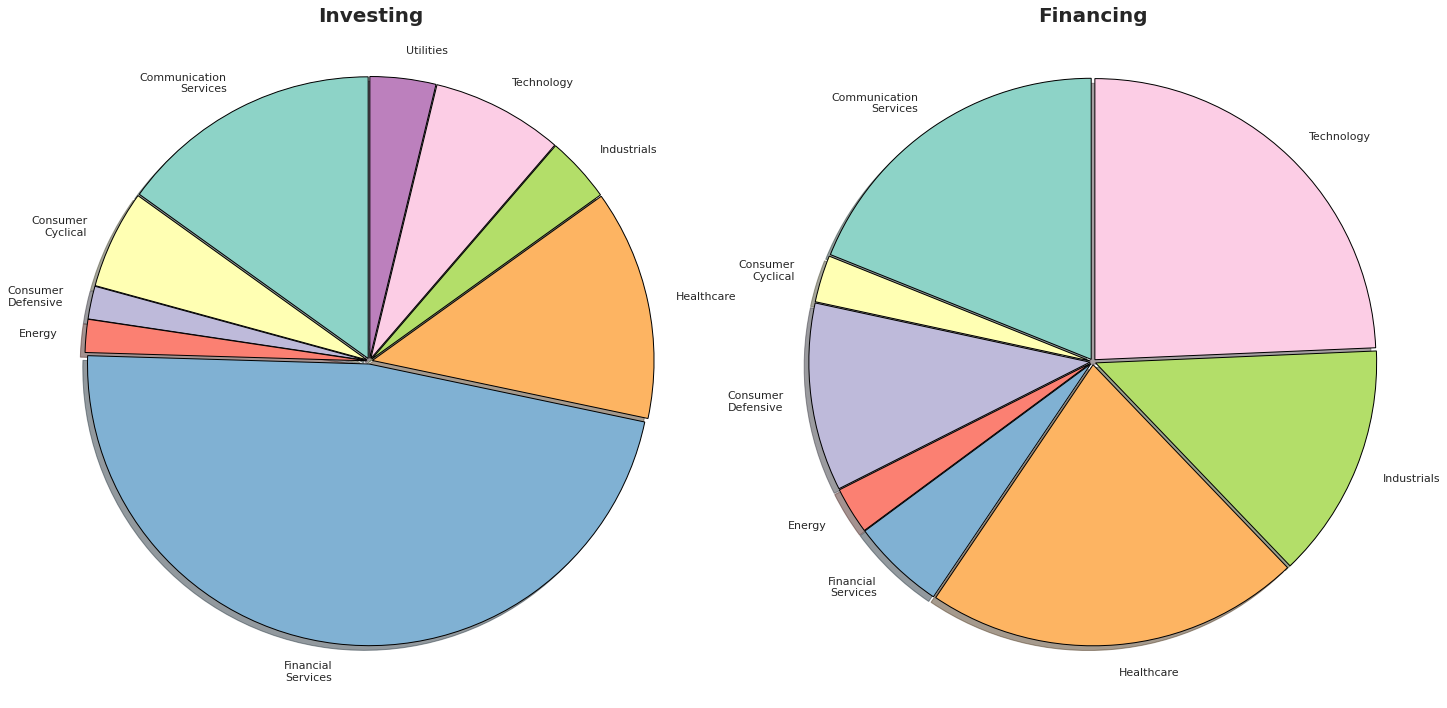

In [76]:
cash_flow_outliers = fundamentals.plot_sectors(
    data,
    columns=['Investing', 'Financing'],
    show_barplot=True,
    show_outliers=True
)